In [1]:
%load_ext autoreload
%autoreload 2

For the canonical results, lets plot all the noise realisations for a high SNR


How do these compare to our new resuts?

In [2]:
import sys
import json 
import pandas as pd 
import numpy as np 
try:
    sys.path.remove("../py_src") # Hacky way to add higher directory to python modules path. 
except:
    pass
sys.path.append("../py_src") # Means that I dont have to make src/ a proper python package

Plotting this many files: 10
Extracting data from file:  /Users/t1/github_repos/StateSpacePTA/data/clean/eg_canonical_earth_5e-15_1245_result.json
The evidence is: 585619.8001630775
The number of samples is: 4980
Variable/Injection/Median
omega_gw 500.0 498.47356664611976
phi0_gw 0.2 0.18097557745319487
psi_gw 2.5 2.416069515452495
iota_gw 1.0 0.8610449343939721
delta_gw 1.0 0.8323156329879116
alpha_gw 1.0 0.9618617200134365
h 5.0 4.96332300257081
-------------------------------
VARS TO PLOT ARE: ['omega_gw', 'phi0_gw', 'psi_gw', 'iota_gw', 'delta_gw', 'alpha_gw', 'h']
The error in the 1D posteriors is as follows:
$\Omega$ 0.0030231681265943584 1.7241121366736452
$\Phi_0$ 0.5640904218662861 0.14071881297554575
$\psi$ 0.050892258017755265 0.16329750094738732
$\iota$ 0.3080935772517099 0.3744427385868175
$\delta$ 0.18292920774198665 0.21861556715128128
$\alpha$ 0.17236239076676427 0.24582453981973407
$h_{0, \times 10}$ 0.19324342001051004 1.193940067764504
*****************************
d

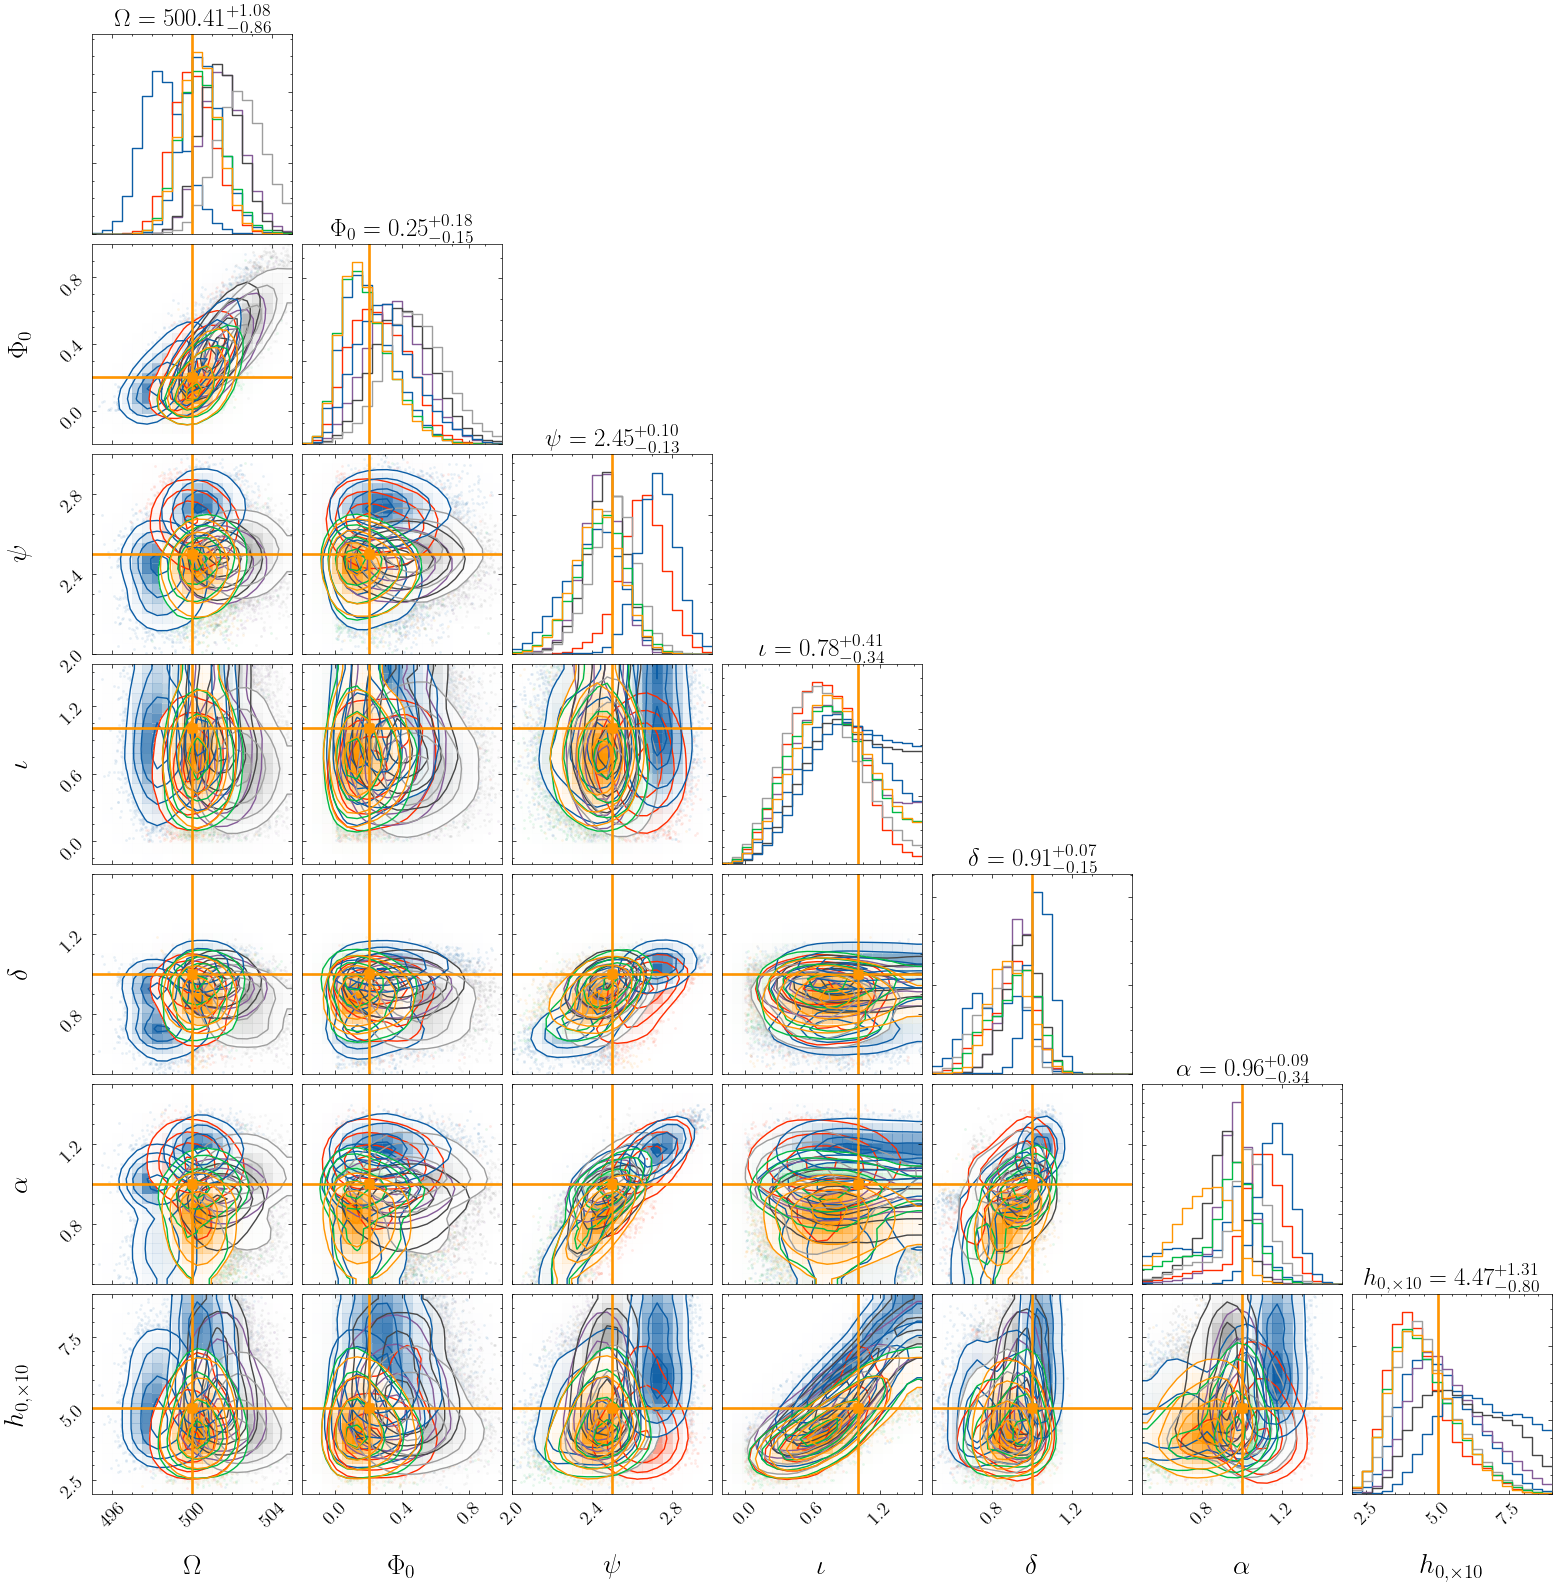

In [5]:

import glob 
from plotting import stacked_corner


#default values of GW parameters
ranges=[(4.95e-7,5.05e-7),(-0.2,1.0),(2.0,3.0),(-0.2,np.pi/2),(0.5,1.5),(0.5,1.5),(2e-15,9e-15)]


#ranges = None
injection_parameters = [5e-7,0.20,2.50,1.0,1.0,1.0,5e-15]
labels = [r'$\Omega$',r'$\Phi_0$',r'$\psi$',r'$\iota$', r'$\delta$',r'$\alpha$',r'$h_{0, \times 10}$']
variables_to_plot = ["omega_gw","phi0_gw","psi_gw","iota_gw","delta_gw","alpha_gw", "h"]
axes_scales = None

list_of_files = sorted(glob.glob('/Users/t1/github_repos/StateSpacePTA/data/clean/*_earth_5e-15*')) #all the low snr pulsar results

#or select manually
#idx = 10
#list_of_files = list_of_files[idx:idx+10]
#list_of_files = ['/Users/t1/github_repos/StateSpacePTA/data/nested_sampling/compressed_files/bigrun_pulsar_5e-15_1300']

number_of_files_to_plot = len(list_of_files)
print("Plotting this many files:", number_of_files_to_plot)
#Corner plot of GW parameters
fig = stacked_corner(list_of_files,
                   number_of_files_to_plot,
                   variables_to_plot,
                   labels,
                   injection_parameters,
                   ranges,
                   axes_scales,
                   scalings = [1e9,1e15], #the scalings for omega and h
                   savefig=None,
                   smooth=True,smooth1d=True)




chi vals are =  [2.20508423 3.73837182 4.64342782 3.84454169 2.03147765 2.1615264
 2.7393055  0.29304713 0.52094514 2.6468707  0.75625183 2.69753421
 4.72535501 1.80480547 1.22838701 1.52531055 0.95286369 5.88509644
 3.21021583 0.04719118 5.83980336 2.18004167 3.37310913 4.83324786
 5.11353816 2.16383243 4.41393604 2.9784791  2.82463386 4.82152681
 6.10798125 5.59964568 1.81245195 4.24446491 5.69068483 5.94022957
 4.96810897 3.3210893  5.35316912 4.61872321 2.78637006 0.43819632
 3.62569269 3.79912049 5.5055721  2.39926347 0.43862898]
Extracting data from file:  /Users/t1/github_repos/StateSpacePTA/data/clean/eg_canonical_pulsar_1e-12_1245_result.json
The evidence is: 582553.8634627829
The number of samples is: 9739
Variable/Injection/Median
chi0 2.2050842339981926 2.2043615689534066
chi1 3.7383718155701757 3.736668126957465
chi2 4.64342781970177 4.664097908724811
chi3 3.8445416942334845 3.8408203271152863
chi4 2.031477654506901 2.026640520094303
-------------------------------
VARS TO

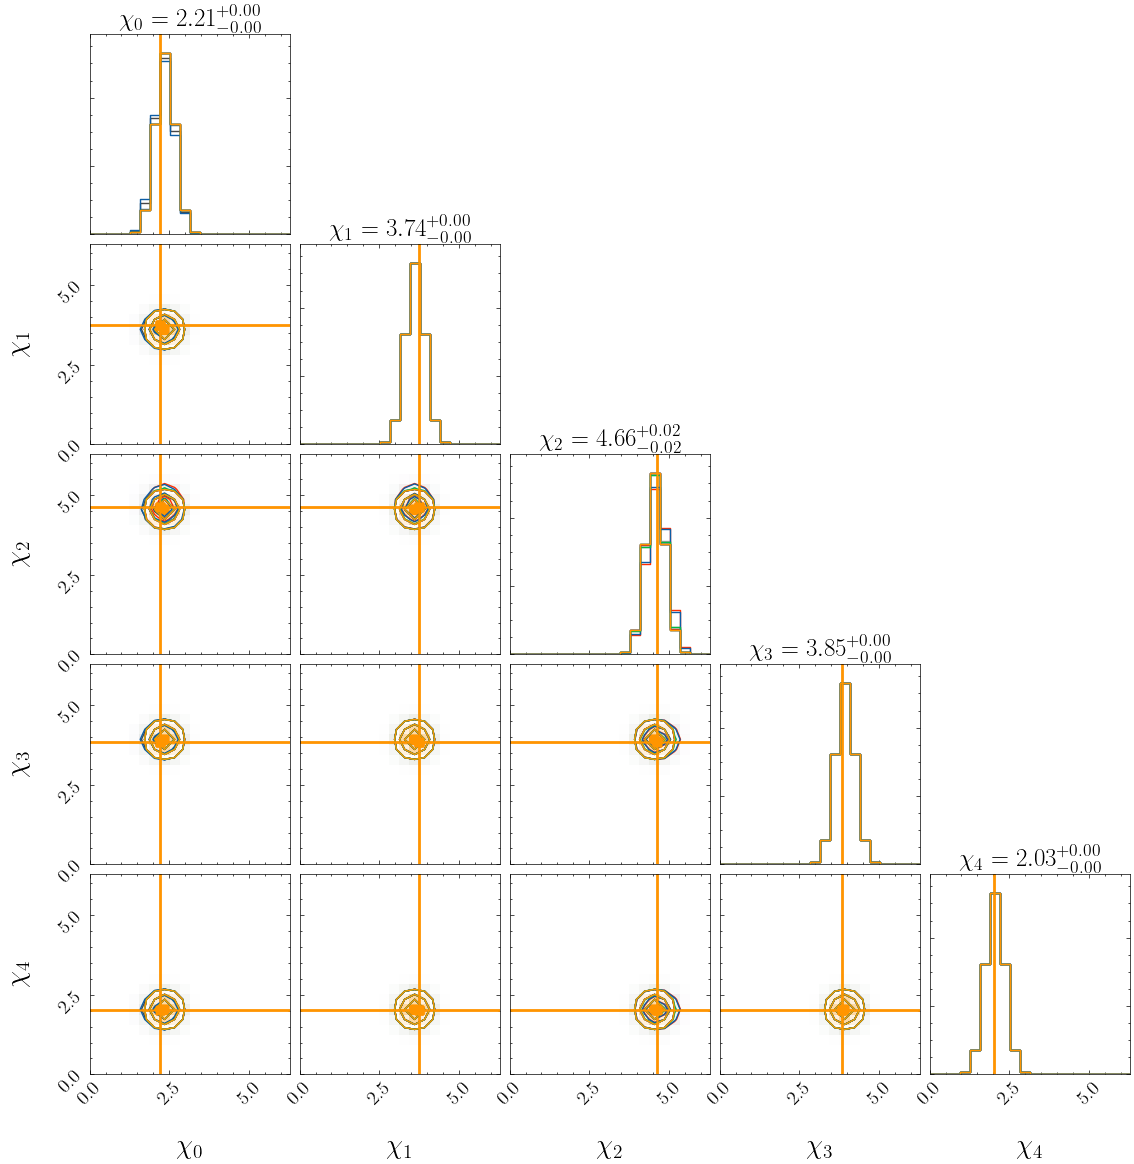

In [5]:
from plotting import plot_custom_corner


#default values of GW parameters
ranges=None


num_chi = 47
variables_to_plot = [f'chi{i}' for i in range(num_chi)]
labels  = [rf'$\chi_{i}$' for i in range(num_chi)]



#Calculate what the injections would have been


from system_parameters import SystemParameters
from pulsars import Pulsars

seed = 1251 #seed does not matter here. We are just getting chi values
measurement_model = 'pulsar'
h=1e-12
P   = SystemParameters(h=h,σp=None,σm=1e-11,use_psr_terms_in_data=True,measurement_model=measurement_model,seed=seed) # define the system parameters as a dict. Todo: make this a class
PTA = Pulsars(P)                                       # setup the PTA
chi = PTA.chi

injection_parameters = [chi[i] for i in range(num_chi)] 
axes_scales = None
ranges = [(0,2*np.pi) for i in range(num_chi)]




#Select a subset of chi vals
num_chi = 5
initial_idx = 0
variables_to_plot = variables_to_plot[initial_idx:initial_idx+num_chi]
labels = labels[initial_idx:initial_idx+num_chi]
injection_parameters = injection_parameters[initial_idx:initial_idx+num_chi]
ranges = ranges[initial_idx:initial_idx+num_chi]

#list_of_files = ['/Users/t1/github_repos/StateSpacePTA/data/nested_sampling/compressed_files/bigrun_pulsar_5e-15_1252']
list_of_files = sorted(glob.glob('/Users/t1/github_repos/StateSpacePTA/data/clean/*_pulsar_1e-12*')) #all the low snr pulsar results
number_of_files_to_plot = len(list_of_files)

fig = stacked_corner(list_of_files,
                   number_of_files_to_plot,
                   variables_to_plot,
                   labels,
                   injection_parameters,
                   ranges,
                   axes_scales,
                   scalings = [1,1], #the scalings for omega and h
                   savefig='corner_lowSNR',
                   smooth=True,smooth1d=True)



